## Examples using RegressionTree

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from RegressionTree import RegressionTree

# Evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Data visualization
import matplotlib.pyplot as plt

In [2]:
seed = 441

### Applying RegressionTree on Data with 1 Feature

In [41]:
# Simulate data
def true_model(X):
    return -X**2 + 2*X

sample_size = 800
np.random.seed(seed)

noise = np.random.normal(scale=4, size=sample_size)
X = torch.Tensor(np.random.uniform(-3, 7, size=sample_size))
y = torch.Tensor(true_model(X) + noise)

(X.shape, y.shape)

(torch.Size([800]), torch.Size([800]))

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
Xtrain_scaled = torch.Tensor(scaler.fit_transform(Xtrain.reshape(-1,1)))
Xtest_scaled = torch.Tensor(scaler.transform(Xtest.reshape(-1,1)))

model = RegressionTree(min_samples_split=20, max_depth=15)
model.fit(Xtrain_scaled, ytrain)

y_pred = model.predict(Xtest_scaled)
print("Mean squared error of predictions by regression tree:", mse(ytest, y_pred))

Mean squared error of predictions by regression tree: 34.127961978708434


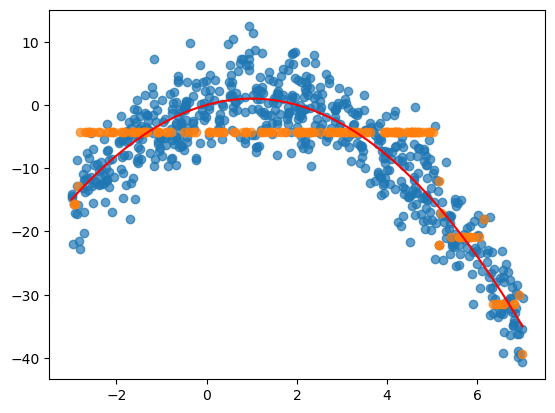

In [30]:
plt.scatter(Xtrain, ytrain, alpha=0.7)
plt.scatter(Xtest, y_pred, alpha=0.7)

sorted_idx = X.argsort()
plt.plot(X[sorted_idx], true_model(X[sorted_idx]), color='r')

plt.show()

In [40]:
# Predict using a single observation
observation = torch.mean(X)
y_pred = model.predict(scaler.transform(observation.reshape(-1,1)))

print('Feature value:', observation)
print('True target value:', true_model(observation))
print('Predicted target value:', y_pred)

Feature value: tensor(2.0202)
True target value: tensor(-0.0409)
Predicted target value: tensor([-4.2583])


### Applying RegressionTree on Data with 3 Features

In [4]:
data = pd.read_csv("cars.csv")
data

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [5]:
X = torch.Tensor(data.drop('MPG', axis=1).values)
y = torch.Tensor(data['MPG'].values)

(X.shape, y.shape)

(torch.Size([392, 3]), torch.Size([392]))

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
Xtrain_scaled = torch.Tensor(scaler.fit_transform(Xtrain))
Xtest_scaled = torch.Tensor(scaler.transform(Xtest))

model = RegressionTree(max_depth=15)
model.fit(Xtrain_scaled, ytrain)

y_pred = model.predict(Xtest_scaled)
print("Mean squared error of predictions by regression tree:", mse(ytest, y_pred))

Mean squared error of predictions by regression tree: 33.53292


In [24]:
# Predict using a single observation
observation = torch.mean(Xtrain_scaled, axis=0)
y_pred = model.predict(observation.reshape(1,-1))
print('Feature values:', observation)
print('Prediction:', y_pred)

Feature values: tensor([6.0938e-09, 9.1406e-09, 7.6172e-09])
Prediction: tensor([25.4000])
